In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = '/mnt/labserver/HURTAK_Femke/Experimental_data/Optogenetics/Optobot/G7/GtACR2/231129_red_led/113230_s2a10_p6-0/'
centroid_file_name = 'G7_GtACR2_p6-0_80fps_tracked.pkl'
centroid_file_path = os.path.join(data_path, centroid_file_name)
stimulation_file_name = 'experiment_dict.npy'
stimulation_file_path = os.path.join(data_path, stimulation_file_name)


In [3]:
stim_data = np.load(stimulation_file_path, allow_pickle=True).item()
#stim_data['fly0']['on0']

In [4]:
data = pd.read_pickle(centroid_file_path)

In [5]:
# add a column 'stimulation' to the data frame, where the value is 1 if the
# stimulus was on and 0 if the stimulus was off.
dlc_data_path = os.path.join(data_path, 'resultsDLC')
data['stimulation'] = 0


In [7]:
npy_file = np.load(os.path.join(data_path,'resultsDLC/vid_p6-0_off0_fly0.npy'), allow_pickle=True)
npy_file

array([[424.17597429, 188.43518147, 178.76789856],
       [424.17355427, 188.66380515, 178.75566101],
       [424.18106832, 188.70125723, 178.65974426],
       ...,
       [428.30291896, 190.09675444, 179.66589355],
       [428.32719585, 190.0625341 , 179.71334839],
       [428.34910879, 189.9409957 , 179.84809875]])

In [6]:
start_frame = stim_data['fly0'][stim_data['stimulation_paradigm'][0]]['startFrame']
end_frame = stim_data['fly0'][stim_data['stimulation_paradigm'][0]]['stopFrame']
if 'on' in stim_data['stimulation_paradigm'][0]:
    data.loc[start_frame:end_frame, 'stimulation'] = 1
    # add DLC data
# find file starting with 'vid_p6-0_' + stim and ending with '.h5'
dlc_file = [f for f in os.listdir(dlc_data_path) if f.startswith('vid_p6-0_' + stim_data['stimulation_paradigm'][0]) and f.endswith('.h5')]
dlc_data = pd.read_hdf(os.path.join(dlc_data_path, dlc_file[0]))
# remove the first level of columns indexing
dlc_data.columns = dlc_data.columns.droplevel(0)
# set index from start_frame to end_frame
dlc_data = dlc_data.set_index(np.arange(start_frame, end_frame))
# add the dlc data to the data frame
data = data.join(dlc_data)
del dlc_file, dlc_data

for stim in stim_data['stimulation_paradigm'][1:]: # list on 'off0', 'on0', 'off1', 'on1', ...
    start_frame = stim_data['fly0'][stim]['startFrame']
    end_frame = stim_data['fly0'][stim]['stopFrame']
    if 'on' in stim:
        data.loc[start_frame:end_frame, 'stimulation'] = 1
        # add DLC data
    # find file starting with 'vid_p6-0_' + stim and ending with '.h5'
    dlc_file = [f for f in os.listdir(dlc_data_path) if f.startswith('vid_p6-0_' + stim) and f.endswith('.h5')]
    dlc_data = pd.read_hdf(os.path.join(dlc_data_path, dlc_file[0]))
    # remove the first level of columns indexing
    dlc_data.columns = dlc_data.columns.droplevel(0)
    # set index from start_frame to end_frame
    dlc_data = dlc_data.set_index(np.arange(start_frame, end_frame))
    # rename the index to 'frame'
    dlc_data.index.names = ['frame']
    # add the dlc data to the data frame
    data.iloc[start_frame:end_frame, :].loc[:,dlc_data.columns] = dlc_data
    del dlc_file, dlc_data
data


0             stimulation RFbodyCoxa                        \
            pos_x       pos_y                      x          y likelihood   
frame                                                                        
0      424.175974  188.435181           0  72.796944  47.004749        1.0   
1      424.173554  188.663805           0  72.925514  47.971123        1.0   
2      424.181068  188.701257           0  72.919250  48.009033        1.0   
3      424.156335  188.633845           0  72.897148  48.005547        1.0   
4      424.148170  188.674887           0  72.891510  47.998829        1.0   
...           ...         ...         ...        ...        ...        ...   
14395  144.004347  485.297512           1  73.088951  48.744038        1.0   
14396  144.039725  485.284349           1  73.131126  48.777721        1.0   
14397  144.054755  485.346835           1  73.402100  49.122807        1.0   
14398  144.054755  485.346835           1  73.366684  49.250793        1.0   
14399  144.066032  485.383802           1  73.318726  49.309685        1.0   

      RFfemurTibia                       RFtibiaTarsus  ...      Rwing  \
                 x          y likelihood             x  ... likelihood   
frame                                                   ...              
0        80.126297  43.966358        1.0     80.093315  ...        1.0   
1        81.142281  44.909023        1.0     82.004593  ...        1.0   
2        81.072556  44.896553        1.0     81.955421  ...        1.0   
3        80.983940  44.893715        1.0     81.959534  ...        1.0   
4        81.048561  44.808434        1.0     82.025032  ...        1.0   
...            ...        ...        ...           ...  ...        ...   
14395    81.199677  42.088913        1.0     78.176598  ...        1.0   
14396    81.203827  42.051815        1.0     78.201111  ...        1.0   
14397    81.462433  42.942242        1.0     78.806595  ...        1.0   
14398    82.264793  42.326298        1.0     78.806656  ...        1.0   
14399    82.234268  42.495262        1.0     78.731918  ...        1.0   

           Lwing                            Thorax                        \
               x           y likelihood          x          y likelihood   
frame                                                                      
0      65.486961  115.730431        1.0  70.164413  57.280418        1.0   
1      66.784958  115.072723        1.0  70.319206  58.251976        1.0   
2      66.796532  115.071388        1.0  70.273911  58.204533        1.0   
3      66.804352  115.082352        1.0  70.250648  58.226051        1.0   
4      66.833000  115.049332        1.0  70.221657  58.229141        1.0   
...          ...         ...        ...        ...        ...        ...   
14395  66.083107  114.100784        1.0  70.906929  59.248440        1.0   
14396  66.087982  114.086319        1.0  70.931709  59.226013        1.0   
14397  66.107796  114.816971        1.0  71.246880  60.051819        1.0   
14398  66.020439  114.902710        1.0  71.268089  60.015572        1.0   
14399  65.950829  114.971169        1.0  71.193352  59.961422        1.0   

         Abdomen                        
               x          y likelihood  
frame                                   
0      69.907166  95.227386        1.0  
1      70.031281  95.652481        1.0  
2      70.035645  95.638512        1.0  
3      70.039993  95.628304        1.0  
4      70.014236  95.592949        1.0  
...          ...        ...        ...  
14395  70.636497  93.038979        1.0  
14396  70.628822  93.030067        1.0  
14397  71.177841  93.472687        1.0  
14398  71.131470  93.462173        1.0  
14399  71.070770  93.461243        1.0  

[14400 rows x 99 columns]

In [24]:
#plt.plot(data['RFbodyCoxa','x'])
#plt.plot(data[(0,'pos_x')])

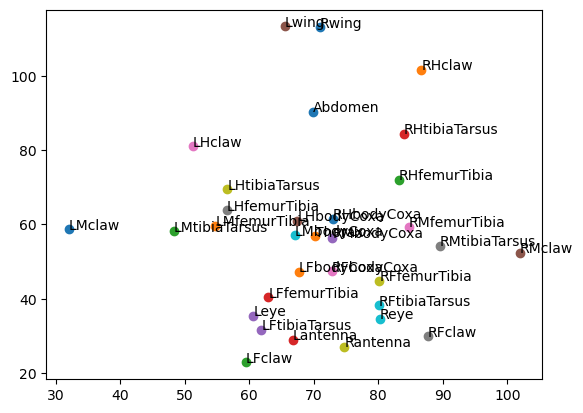

In [36]:
time_point = 14000
dlc_key_points = data.columns.levels[0].drop('stimulation')
for pts in dlc_key_points[1:]:
    plt.scatter(data[(pts,'x')][0], data[(pts,'y')][time_point], label=pts)
    # write the label of the point
    plt.text(data[(pts,'x')][0], data[(pts,'y')][time_point], pts)

In [8]:
#data
# get data indexed by the second level of the columns without swapping
#data.loc[:, (slice(None), 'pos_x')]
data.columns

MultiIndex([(              0,      'pos_x'),
            (              0,      'pos_y'),
            (  'stimulation',           ''),
            (   'RFbodyCoxa',          'x'),
            (   'RFbodyCoxa',          'y'),
            (   'RFbodyCoxa', 'likelihood'),
            ( 'RFfemurTibia',          'x'),
            ( 'RFfemurTibia',          'y'),
            ( 'RFfemurTibia', 'likelihood'),
            ('RFtibiaTarsus',          'x'),
            ('RFtibiaTarsus',          'y'),
            ('RFtibiaTarsus', 'likelihood'),
            (       'RFclaw',          'x'),
            (       'RFclaw',          'y'),
            (       'RFclaw', 'likelihood'),
            (   'RMbodyCoxa',          'x'),
            (   'RMbodyCoxa',          'y'),
            (   'RMbodyCoxa', 'likelihood'),
            ( 'RMfemurTibia',          'x'),
            ( 'RMfemurTibia',          'y'),
            ( 'RMfemurTibia', 'likelihood'),
            ('RMtibiaTarsus',          'x'),
          

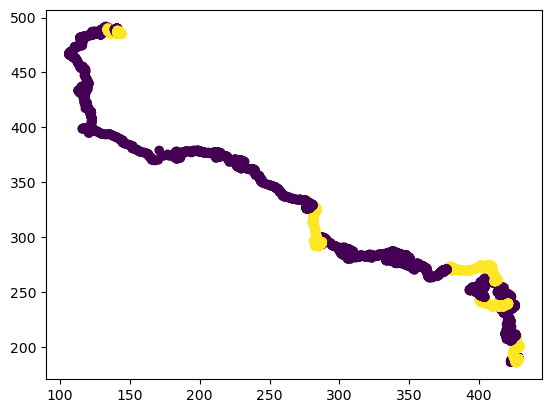

In [9]:
plt.scatter(
    data.loc[:, (slice(None), 'pos_x')],
    data.loc[:, (slice(None), 'pos_y')],
    c=data['stimulation'])

In [10]:
dlc_path = os.path.join(data_path, 'resultsDLC','vid_p6-0_on0_fly0DLC_resnet50_dlcTrackingAug6shuffle1_1030000.h5')
dlc_data = pd.read_hdf(dlc_path)
dlc_data

scorer    DLC_resnet50_dlcTrackingAug6shuffle1_1030000                        \
bodyparts                                   RFbodyCoxa                         
coords                                               x          y likelihood   
0                                            73.793900  48.286373        1.0   
1                                            73.772171  48.279736        1.0   
2                                            73.776733  48.249718        1.0   
3                                            73.750893  48.241753        1.0   
4                                            73.792549  48.276855        1.0   
..                                                 ...        ...        ...   
395                                          71.168510  49.432785        1.0   
396                                          73.812859  40.814796        1.0   
397                                          74.204765  42.395096        1.0   
398                                          73.041512  47.632053        1.0   
399                                          71.430443  48.805443        1.0   

scorer                                                                 \
bodyparts RFfemurTibia                       RFtibiaTarsus              
coords               x          y likelihood             x          y   
0            82.455078  45.885395        1.0     80.155914  37.486782   
1            82.462509  45.838890        1.0     80.145164  37.517139   
2            82.474823  45.844940        1.0     80.028366  37.477158   
3            82.464584  45.762196        1.0     80.081497  37.406250   
4            82.498566  45.822403        1.0     80.120270  37.479893   
..                 ...        ...        ...           ...        ...   
395          79.184631  43.786434        1.0     78.527084  36.588230   
396          83.145332  38.666374        1.0     77.990433  30.180513   
397          84.379623  41.225544        1.0     78.525459  31.116138   
398          84.112877  42.905884        1.0     78.827522  33.772873   
399          79.456604  43.243237        1.0     78.554718  35.667114   

scorer                           ...                                    \
bodyparts                RFclaw  ...      Rwing      Lwing               
coords    likelihood          x  ... likelihood          x           y   
0                1.0  84.543915  ...        1.0  67.993690  115.647568   
1                1.0  84.484818  ...        1.0  67.934341  115.630852   
2                1.0  84.227005  ...        1.0  67.992424  115.595856   
3                1.0  84.293930  ...        1.0  67.908424  115.652573   
4                1.0  84.391724  ...        1.0  67.865974  115.680290   
..               ...        ...  ...        ...        ...         ...   
395              1.0  81.218109  ...        1.0  68.881790  114.805122   
396              1.0  80.272591  ...        1.0  66.071175  110.367905   
397              1.0  80.694786  ...        1.0  70.010536  111.866302   
398              1.0  82.645790  ...        1.0  67.696365  111.485207   
399              1.0  81.579124  ...        1.0  70.470512  115.307045   

scorer                                                                       \
bodyparts                Thorax                          Abdomen              
coords    likelihood          x          y likelihood          x          y   
0                1.0  70.487885  61.393822        1.0  71.060890  95.025955   
1                1.0  70.470589  61.320930        1.0  71.149857  95.053474   
2                1.0  70.439003  61.203716        1.0  71.084824  94.957870   
3                1.0  70.517075  61.297504        1.0  71.161804  95.077812   
4                1.0  70.584106  61.368488        1.0  71.204597  95.101326   
..               ...        ...        ...        ...        ...        ...   
395              1.0  70.173531  61.710567        1.0  71.869843  95.029190   
396              1.0  70.4807

In [11]:
dlc_data.columns.levels[1]

Index(['Abdomen', 'LFbodyCoxa', 'LFclaw', 'LFfemurTibia', 'LFtibiaTarsus',
       'LHbodyCoxa', 'LHclaw', 'LHfemurTibia', 'LHtibiaTarsus', 'LMbodyCoxa',
       'LMclaw', 'LMfemurTibia', 'LMtibiaTarsus', 'Lantenna', 'Leye', 'Lwing',
       'RFbodyCoxa', 'RFclaw', 'RFfemurTibia', 'RFtibiaTarsus', 'RHbodyCoxa',
       'RHclaw', 'RHfemurTibia', 'RHtibiaTarsus', 'RMbodyCoxa', 'RMclaw',
       'RMfemurTibia', 'RMtibiaTarsus', 'Rantenna', 'Reye', 'Rwing', 'Thorax'],
      dtype='object', name='bodyparts')

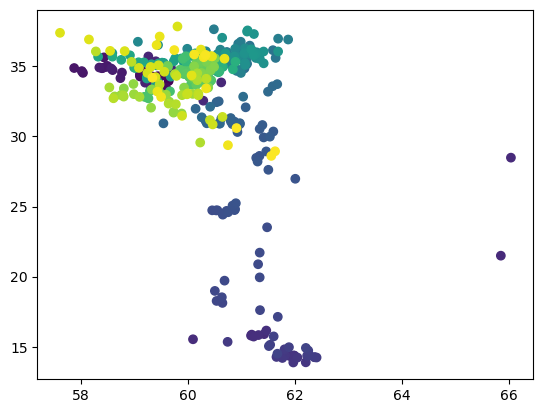

In [12]:
plt.scatter(
    dlc_data.loc[:, (slice(None), 'LFclaw', 'x')],
    dlc_data.loc[:, (slice(None), 'LFclaw', 'y')],
    c=dlc_data.index)

In [13]:
def tracking_motion_energy(data):
    # calculate the motion energy of the legs
    # data is a pandas dataframe with the columns containing the x and y
    # coordinates of the legs
    # returns a pandas dataframe with the motion energy of each leg
    # the motion energy is calculated as the sum of the squared differences
    # between the coordinates of the leg in the current frame and the
    # coordinates of the leg in the previous frame
    for point in data.columns.levels[1]:
        dx = data.loc[:, (slice(None), point, 'x')].diff()
        dy = data.loc[:, (slice(None), point, 'y')].diff()
        dx = dx.fillna(0)
        dy = dy.fillna(0)
        # create a new column
        data[(slice(None), point, 'dx')] = dx 

    return data
    

In [14]:
dlc_data = tracking_motion_energy(dlc_data)
dlc_data

#data.loc[:, (slice(None), point, 'me')] = np.sqrt(np.square(dx).values + np.square(dy).values)


InvalidIndexError: slice(None, None, None)

In [ ]:
plt.plot(ME['LFclaw'])